In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
import tensorflow as tf
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras import regularizers

# Step 1: Data Preprocessing
data = pd.read_csv('Seasons_Stats.csv')  # Replace with the path to your dataset

# Drop unnecessary columns
data = data.drop(['blanl','blank2'], axis=1)

# Handle missing values
data = data.dropna()

# Normalize numerical features
scaler = MinMaxScaler()
column_names = list(data.columns)
numerical_features = column_names[4:]
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Step 2: Feature Selection
selected_features = column_names[4:]
target_variable = 'PER'

# Step 3: Model Construction
X = data[selected_features]
y = data[target_variable]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def create_model():
    model = Sequential()
    model.add(Dense(32, activation='relu', input_shape=(len(selected_features),),kernel_regularizer=regularizers.l2(0.001)))  # Add L2 regularization
    model.add(Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.001)))  # Add L2 regularization
    model.add(Dense(1, activation='linear'))
    optimizer = Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

model = create_model()

# Step 4: Model Training
learning_rate = 0.001
optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='mean_squared_error')

epochs = 100
batch_size = 32


model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1)

history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1)

# Step 5: Model Evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)


# Step 6: Hyperparameter Tuning
param_grid = {'epochs': [50, 100, 150],
              'batch_size': [32, 64, 128]}

model = KerasRegressor(build_fn=create_model, verbose=0)
grid_search = GridSearchCV(model, param_grid, cv=3)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print('Best Parameters:', best_params)

best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
mse_best = mean_squared_error(y_test, y_pred_best)
print('Best Model Mean Squared Error:', mse_best)

Metal device set to: Apple M2
Epoch 1/100


2023-05-19 18:48:07.472385: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


287/287 [==============================] - 2s 6ms/step - loss: 0.0437
Epoch 2/100
287/287 [==============================] - 2s 6ms/step - loss: 0.0200
Epoch 3/100
287/287 [==============================] - 2s 6ms/step - loss: 0.0121
Epoch 4/100
287/287 [==============================] - 2s 6ms/step - loss: 0.0078
Epoch 5/100
287/287 [==============================] - 2s 6ms/step - loss: 0.0052
Epoch 6/100
287/287 [==============================] - 2s 6ms/step - loss: 0.0036
Epoch 7/100
287/287 [==============================] - 2s 6ms/step - loss: 0.0026
Epoch 8/100
287/287 [==============================] - 2s 6ms/step - loss: 0.0019
Epoch 9/100
287/287 [==============================] - 2s 6ms/step - loss: 0.0015
Epoch 10/100
287/287 [==============================] - 2s 6ms/step - loss: 0.0012
Epoch 11/100
287/287 [==============================] - 2s 6ms/step - loss: 9.8447e-04
Epoch 12/100
287/287 [==============================] - 2s 6ms/step - loss: 8.4944e-04
Epoch 13/100
287/

287/287 [==============================] - 2s 6ms/step - loss: 2.8730e-04
Epoch 96/100
287/287 [==============================] - 2s 6ms/step - loss: 2.7487e-04
Epoch 97/100
287/287 [==============================] - 2s 6ms/step - loss: 2.7466e-04
Epoch 98/100
287/287 [==============================] - 2s 6ms/step - loss: 2.7517e-04
Epoch 99/100
287/287 [==============================] - 2s 6ms/step - loss: 2.7417e-04
Epoch 100/100
287/287 [==============================] - 2s 7ms/step - loss: 2.7148e-04
Epoch 1/100
287/287 [==============================] - 2s 6ms/step - loss: 2.7541e-04
Epoch 2/100
287/287 [==============================] - 2s 6ms/step - loss: 2.7202e-04
Epoch 3/100
287/287 [==============================] - 2s 7ms/step - loss: 2.6949e-04
Epoch 4/100
287/287 [==============================] - 2s 6ms/step - loss: 2.6933e-04
Epoch 5/100
287/287 [==============================] - 2s 6ms/step - loss: 2.6582e-04
Epoch 6/100
287/287 [==============================] - 2s 6m

287/287 [==============================] - 2s 6ms/step - loss: 2.1639e-04
Epoch 90/100
287/287 [==============================] - 2s 6ms/step - loss: 2.1998e-04
Epoch 91/100
287/287 [==============================] - 2s 6ms/step - loss: 2.2147e-04
Epoch 92/100
287/287 [==============================] - 2s 6ms/step - loss: 2.2785e-04
Epoch 93/100
287/287 [==============================] - 2s 6ms/step - loss: 2.1684e-04
Epoch 94/100
287/287 [==============================] - 2s 6ms/step - loss: 2.1569e-04
Epoch 95/100
287/287 [==============================] - 2s 6ms/step - loss: 2.1437e-04
Epoch 96/100
287/287 [==============================] - 2s 6ms/step - loss: 2.2403e-04
Epoch 97/100
287/287 [==============================] - 2s 6ms/step - loss: 2.1232e-04
Epoch 98/100
287/287 [==============================] - 2s 6ms/step - loss: 2.1958e-04
Epoch 99/100
287/287 [==============================] - 2s 6ms/step - loss: 2.1429e-04
Epoch 100/100
72/72 [==============================] - 0

/var/folders/9v/cw9hhmg564b7fqygfv1r9h780000gn/T/ipykernel_32250/272380777.py:74: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=create_model, verbose=0)


Best Parameters: {'batch_size': 32, 'epochs': 150}
Best Model Mean Squared Error: 7.17525373581752e-05


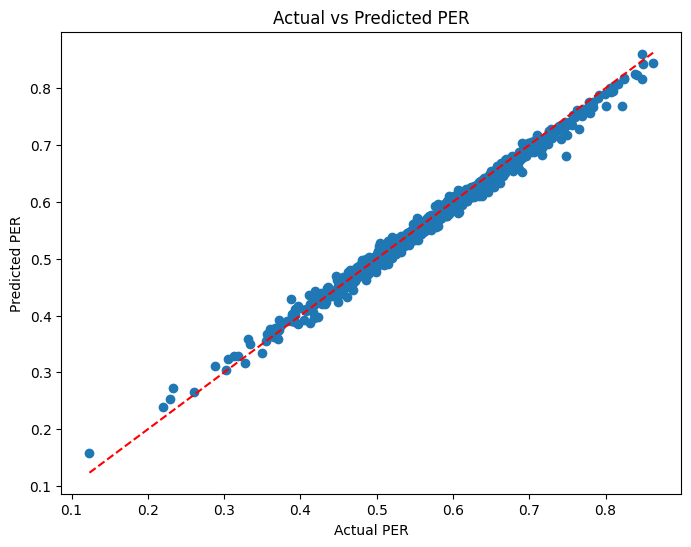

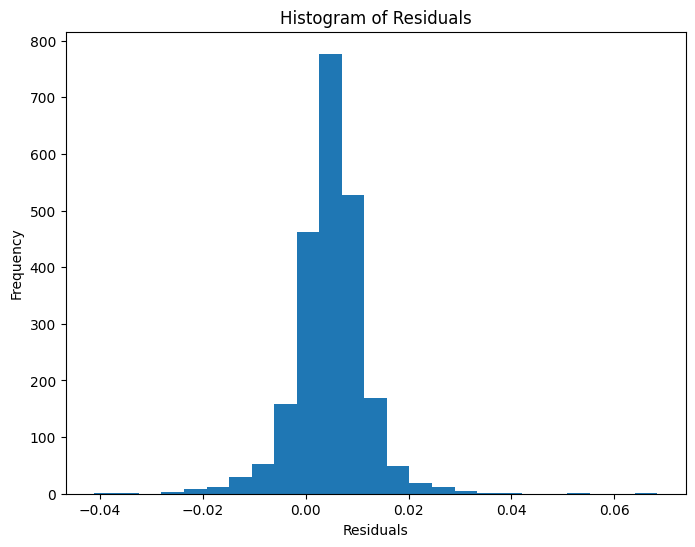

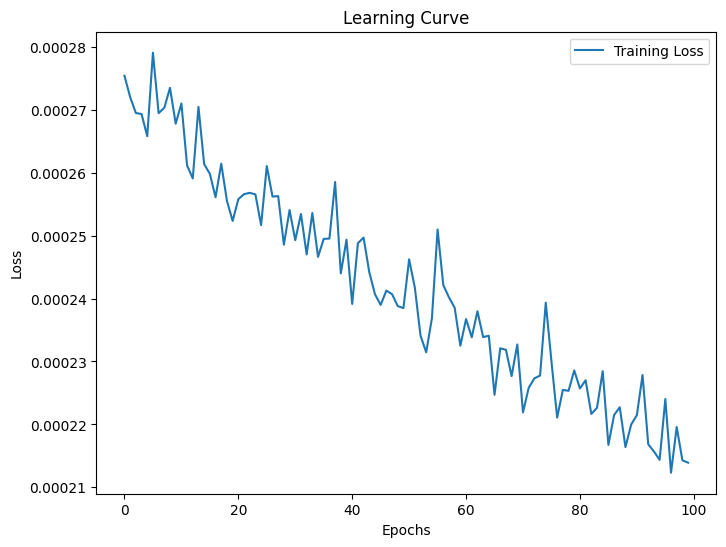

In [4]:
import matplotlib.pyplot as plt

# Scatter plot of actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_best)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual PER')
plt.ylabel('Predicted PER')
plt.title('Actual vs Predicted PER')
plt.show()

# Histogram of residuals
residuals = y_test - y_pred_best
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=25)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Learning Curve')
plt.legend()
plt.show()

In [3]:
import pandas as pd

results = {'Model': ['Base Model', 'Best Model'],
           'MSE': [mse, mse_best]}
results_df = pd.DataFrame(results)

print(results_df)

        Model       MSE
0  Base Model  0.000052
1  Best Model  0.000072
